# Constrained coordinates

In [1]:
import veloxchem as vlx

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 6.


We define a structure in terms of a SMILES string.

In [2]:
molecule = vlx.Molecule.read_smiles("OC=CC=O")
molecule.show(atom_indices=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

We also define the electronic structure theory method to be used as well as an VeloxChem optimization driver.

In [3]:
scf_drv = vlx.XtbDriver()
scf_drv.ostream.mute()

opt_drv = vlx.OptimizationDriver(scf_drv)
opt_drv.ostream.mute()

## Set and freeze internal coordinates

A selection of internal coordinates can be set or frozen during the molecular structure optimization, where the latter choice means that they are frozen to the values given in the initial structure. These options apply to internal coordinates of the types:

- distance
- angle
- dihedral

In [12]:
opt_drv.constraints = [
    "set dihedral 6 1 2 3 0.0",
    "freeze distance 6 1",
]

opt_results = opt_drv.compute(molecule)

In [13]:
final_geometry = vlx.Molecule.read_xyz_string(opt_results["final_geometry"])
final_geometry.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Scan internal coordinates

Relaxed scans of internal coordinates can be performed.

In [6]:
opt_drv.constraints = ["scan dihedral 6 1 2 3 0 360 19"]

opt_results = opt_drv.compute(molecule)

Energies and molecular structures are returned.

In [7]:
opt_results.keys()

dict_keys(['final_geometry', 'scan_energies', 'scan_geometries'])

Let us plot the potential energy curve from the relaxed scan structure optimization.

In [8]:
import numpy as np
import scipy

occc = np.linspace(0, 360, 19)

e_min_in_au = min(opt_results["scan_energies"])

energy_scan = [
    (e - e_min_in_au) * vlx.hartree_in_kcalpermol()
    for e in opt_results["scan_energies"]
]

spline_func = scipy.interpolate.interp1d(occc, energy_scan, kind="cubic")

x_spline = np.linspace(occc[0], occc[-1], 200)
y_spline = spline_func(x_spline)

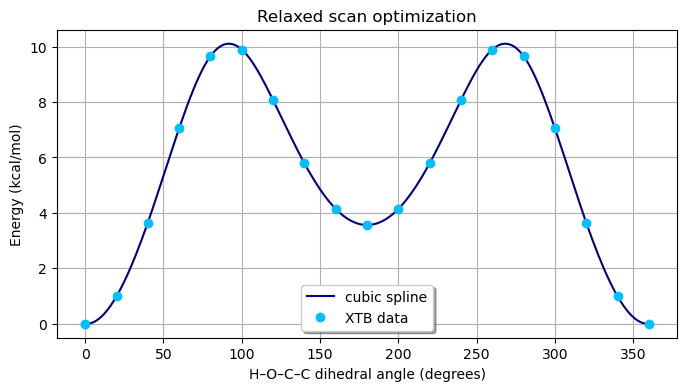

In [9]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_spline, y_spline, "-", color="navy", label="cubic spline")
ax.plot(occc, energy_scan, "o", color="deepskyblue", label="XTB data")

ax.legend(frameon=True, shadow=True, loc="lower center")

ax.grid(True)

ax.set_title("Relaxed scan optimization")
ax.set_xlabel("H–O–C–C dihedral angle (degrees)")
ax.set_ylabel("Energy (kcal/mol)")

plt.show()